In [1]:
import torch
from torch import nn

torch.__version__

'2.5.1'

In [2]:
device = "cuda" if torch.cuda.is_available() else 'cpu'"05 computer_vision_video.ipynb"
device

'cuda'

## 1. Get Data

In [3]:
# this dataset is a subset of food101 dataset(from pytorch) only 10% of the images
# images: 1k
import requests
import zipfile
from pathlib import Path

In [4]:
# setup path to a data folder
data_path = Path('data')
image_path = data_path / "pizza_steak_sushi"

# exist_ok
if image_path.is_dir():
    print(f"{image_path} directory already exist... skip download")
else:
    print(f"{image_path} directory is being created...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# download pizza, steak, sushi
with open(data_path/"pizza_sushi_steak.zip", 'wb') as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(f"Downloading pizza, sushi, steak data...")
    f.write(request.content)

#Unzip data
with zipfile.ZipFile(data_path/"pizza_sushi_steak.zip", 'r') as zip_rep:
    print('Unzipping data...')
    zip_rep.extractall(image_path)

data\pizza_steak_sushi directory already exist... skip download
Unzipping data...


In [5]:
# data_path/"pizza_sushi_steak.zip"
image_path

WindowsPath('data/pizza_steak_sushi')

## 2. Becoming one with the data

In [6]:
import os

def walkthrough_dir(dir_path):
    """ Walks through dir_path returning its contents..."""

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [7]:
walkthrough_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [8]:
# setup training and testing paths
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1. Visualizing image

* get all image paths
* pick a random image path using `python` random.choice()
* get the image class name using `pathlib.path.parent.stem`
* since working with images, opwn image with PIL (pillow) `python`
* show the image and print metadata

data\pizza_steak_sushi\train\sushi\307738.jpg
Random image path: data\pizza_steak_sushi\train\sushi\307738.jpg
Image class: sushi
Image height: 382
Image width: 512


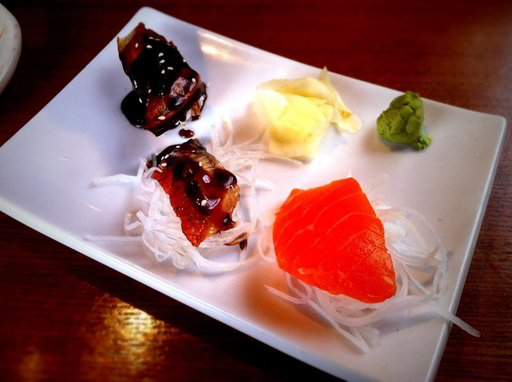

In [9]:
import random
from PIL import Image

# set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3.  get image class (name of directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(381.5), np.float64(-0.5))

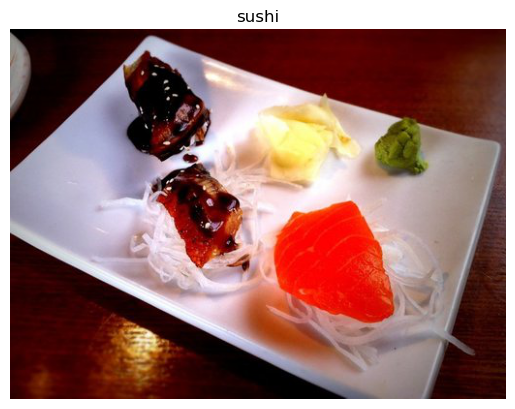

In [10]:
from matplotlib import pyplot as plt 

plt.imshow(img)
plt.title(image_class)
plt.axis(False)



## Transforming data

before we can use image data with pytorch, or any other type of dataset, we have to:

* turn target data into tensors
* turn it into `torch.utils.data.dataset` and subsequesntly a `torch.utils.data.dataloader`

In [11]:
import torch
from torch.utils.data import dataloader
from torchvision import datasets, transforms

### 3.1 Transformin data with `torchvision.transforms`

In [12]:
# write a transform for image
data_transform =  transforms.Compose([ # turn images into tensors
    # Resize images to (64,64)
    transforms.Resize(size=(224,224)),
    # Flip images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn image into a torch.Tensor
    transforms.ToTensor()
])

In [13]:
data_transform(img)

tensor([[[0.2157, 0.2157, 0.2157,  ..., 0.0000, 0.0000, 0.0039],
         [0.2235, 0.2235, 0.2275,  ..., 0.0000, 0.0039, 0.0431],
         [0.2235, 0.2235, 0.2235,  ..., 0.0078, 0.0627, 0.2784],
         ...,
         [0.1765, 0.1804, 0.1804,  ..., 0.1765, 0.1686, 0.1647],
         [0.1412, 0.1490, 0.1569,  ..., 0.1843, 0.1686, 0.1647],
         [0.1412, 0.1569, 0.1804,  ..., 0.1882, 0.1725, 0.1608]],

        [[0.0039, 0.0039, 0.0039,  ..., 0.0078, 0.0118, 0.0118],
         [0.0157, 0.0157, 0.0157,  ..., 0.0078, 0.0118, 0.0471],
         [0.0235, 0.0235, 0.0196,  ..., 0.0078, 0.0588, 0.2745],
         ...,
         [0.0392, 0.0353, 0.0314,  ..., 0.0000, 0.0000, 0.0000],
         [0.0078, 0.0118, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
         [0.0078, 0.0196, 0.0275,  ..., 0.0039, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0039, 0.0078, 0.0431],
         [0.0078, 0.0078, 0.0078,  ..., 0.0039, 0.0549, 0.

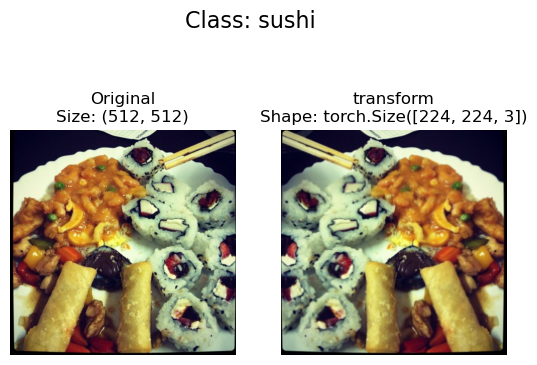

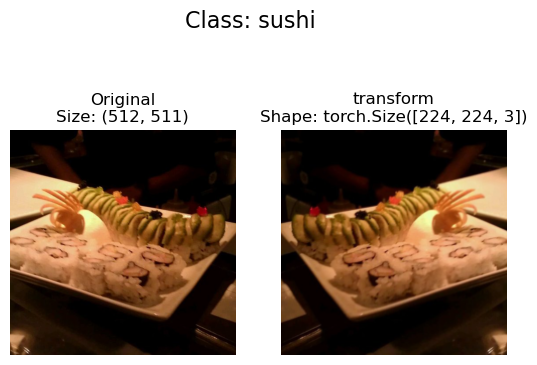

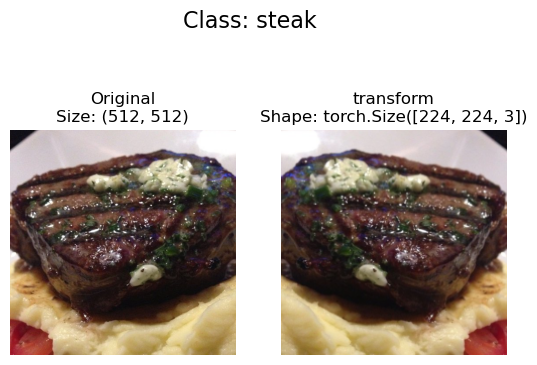

In [14]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):

    """ 
    Selects random images from a path of images and loads/transforms them then plots the original vs the transformed version
    """

    if seed: random.seed(seed)

    random_image_paths = random.sample(image_paths, k=n)
    
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"transform\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)



### 4. Option 1: Loading image data using `ImageFolder`

In [15]:
# Use imagefoler to create a dataset
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # transform for the data
                                  target_transform = None) # transform for the target/label

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [16]:
# Get class names as a list
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [17]:
# get classnames as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
# check the length of the dataset
len(train_data), len(test_data)

(225, 75)

In [19]:
# Index on the train_data Dataset to get a single image and its label
img, label = train_data[0][0], train_data[0][1] 
# print(f"Image tensor:\m {img}")
print(f"Image shape: {img.shape}")
print(f"Image dtype: {img.dtype}")
print(f"Image label: {label}")
print(f"label dtype: {type(label)}")

Image shape: torch.Size([3, 224, 224])
Image dtype: torch.float32
Image label: 0
label dtype: <class 'int'>


Original image shape: torch.Size([3, 224, 224]) -> [color channels, height, width]
Image permute: torch.Size([224, 224, 3]) -> [height, width, color channels]


Text(0.5, 1.0, 'pizza')

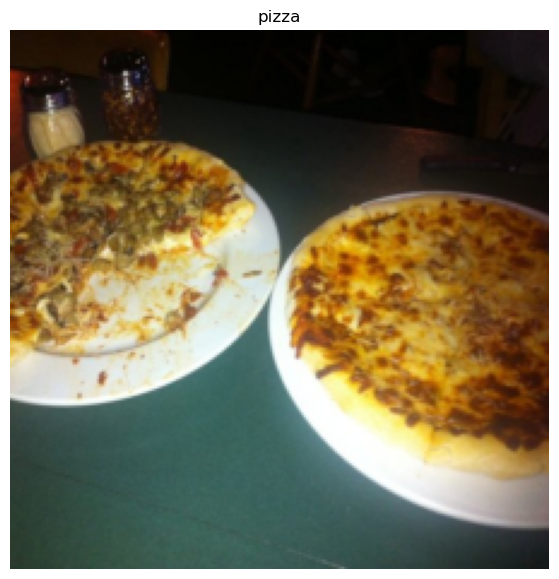

In [20]:
# Rearreange the orader dimensions of the image tensor
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original image shape: {img.shape} -> [color channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color channels]") 

# plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute) 
plt.axis(False) 
plt.title(class_name[label])

## 4.1 images -> dataloader

In [21]:
from torch.utils.data import DataLoader

# Create a DataLoader
# data loader turns the data into batches(iterable)
# batch size is the number of images the model sees at once (machine will bear less load))

BATCH_SIZE = 1

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1acbdb81ff0>,
 <torch.utils.data.dataloader.DataLoader at 0x1acbdd63b80>)

In [22]:
len(train_dataloader), len(test_dataloader) # number of batches 

(225, 75)

In [23]:
img, label = next(iter(train_dataloader))

img.shape, label # shape: [batch_size, color_channels, height, width]

(torch.Size([1, 3, 224, 224]), tensor([1]))

## Loading image data with a custom dataset

* load images from file
* get class names from the dataset
* get classese as dictionary from the Dataset

__pros:__
* can create a dataset out of almost anything
* not limited to pytorch pre-build `Dataset` functions

__cons:__
* even if dataset can be created from almost anything, it doesnt mean it would work
* using a custom `Dataset` often result into more code writing | *prone to preformance issues*

In [24]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [25]:
# Instance of torchvision.datasets.ImageFolder()

train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

function:
* get class names using `os.scandir()` to traverse a target directory
* raise an error if the class names arent found
* turn class names into a dict and a list and return them

In [26]:
# Setup path for target directory

target_directory = train_dir
print(f"Target directory: {target_directory}") 

# Get the class names from the target directory
class_names_found= sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target directory: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [27]:
def find_classes(target_directory: str) -> Tuple[List[str], Dict[str, int]]:
    """
    Returns a list of class names found
    """

    # Get the class names from the target directory
    classes = sorted([entry.name for entry in list(os.scandir(target_directory))])

    # Raise and error if class names are not found
    if not classes:
        raise FileNotFoundError(f"coundt find any class names in {target_directory}")
    
    # create a dictionary of index labesl for class names
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
      
    return classes, class_to_idx

In [28]:
classes = find_classes(target_directory)[0]

### 5.2 Create a custon `Dataset` to replicate `ImageFolder`
*Not necessary only for understanding |`ImageFolder` already exist(tested)*

* Subclass `torch.utils.data.Dataset`
* Init a subclass with a target directory and transform if wanted
*create several attributes:
    * paths - paths to the images
    * transform - transform to be used
    * classes - list of the target classes
* create a function to `load_images()` *this function will open an image*
* overwrite the `__len()__` method to return the length of our dataset
* Overwrite the ``__getitem()__` method to return a given samples when passed an index

In [29]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [30]:
# Create a trandform for the data
train_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [31]:
# Test out image folder custom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transform)

test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transform)

In [32]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x1acbedd7b80>,
 <__main__.ImageFolderCustom at 0x1acbeda98d0>)

In [33]:
len(train_data), len(train_data_custom)

(225, 225)

In [34]:
len(test_data), len(test_data_custom)

(75, 75)

In [35]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [36]:
# check for equality between original and custom dataset

print([train_data_custom.classes, test_data_custom.classes] == [train_data.classes, test_data.classes])

True


### 5.3 Create a function to display random images

* Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize
* To prevent the display getting out of hand, let's camp the number of images to see at 10
* set random seed
* get a list of random samples indexes from the target dataset
* setyp a matplotlib plot
* loop through a random images and plot with plt
* make sure the dimensions of images line up with matplotlib

In [37]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # Adjust display if n is too large
    if n > 10:
        n = 10
        display_shape = False
        print("n is too large, only 10 images will be displayed")   

    # Set seed
    if seed: 
        random.seed(seed)

    # Get random indices
    random_sample_indices = random.sample(range(len(dataset)), k=n)

    # Set up the figure
    plt.figure(figsize=(16, 6))

    # Loop through random indices, plot images and labels
    for i, targ_sample in enumerate(random_sample_indices):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # Adjust tensor dimensions for plotting
        targ_image = targ_image.permute(1, 2, 0)  # [color_channels, height, width] -> [height, width, color_channels]

        # Plot adjusted samples
        plt.subplot(1, 10, i + 1)
        plt.imshow(targ_image)
        plt.axis(False)

        if classes:
            plt.title(classes[targ_label])
            if display_shape:
                plt.xlabel(targ_image.shape)

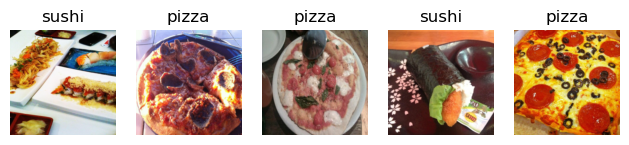

In [38]:
# display random images from the imagefolder

display_random_images(dataset=train_data,
                      classes=class_names_found,
                      n=5,
                      seed=42)

n is too large, only 10 images will be displayed


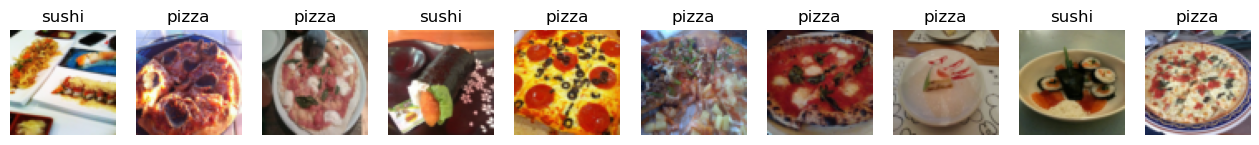

In [39]:
# Display random images from the custom dataset
display_random_images(dataset=train_data_custom,
                      classes=train_data_custom.classes,
                      n=20,
                      seed=42)

In [40]:
# Test indexing
image, label = train_data_custom[0]
print(type(image), label)  # Should print the image tensor type and label


<class 'torch.Tensor'> 0


### 5.4. Turn custom dataset to dataloader

In [41]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1,  
                                    shuffle=False,
                                    num_workers=0) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1acbedaba90>,
 <torch.utils.data.dataloader.DataLoader at 0x1acbf2ecbb0>)

In [42]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## oTHER FORMATS OF TRANSFORMS

__data augmentation__ the process of artificially adding diversity to the training data   

*this case for images, it may mean applying various transformations to the training data(totate, shift, zoom ...)*   
may result into a data that can generalize well however noisy/weird angle.

In [43]:
# looking at trivialaugment

from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [44]:
# get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
# image_path_list[:10]

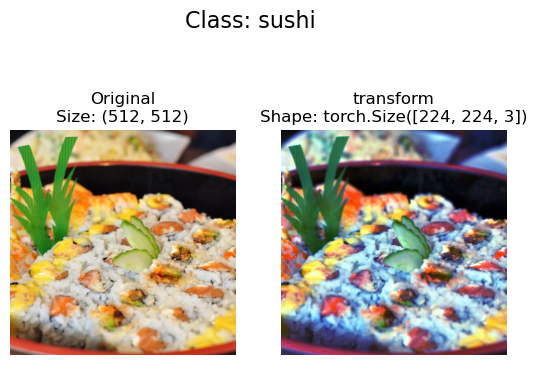

In [45]:
# plot random transfromed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=1,
    seed=None
)

## 7. Model 0: TinyVGG withouth data augmentation

In [46]:
# replicating tinyvgg from cnnexplainer website
# https://cnnexplainer.com/2019/08/28/tinyvgg.html

simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

# 1. Load and transform data
from torchvision import datasets    
tran_data_simple = datasets.ImageFolder(root=train_dir,
                                        transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2. Turn dataset into DataLoader
import os
from torch.utils.data import DataLoader 

# Set the batch size and # of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create dataloaders
train_dataloader_simple = DataLoader(tran_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)  # don't shuffle test data

### 7.2. Create a TinyVGG model class

In [47]:
class TinyVgg(nn.Module):
    """
    """

    def __init__(self, 
                 in_channels: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        
        super(TinyVgg, self).__init__()

        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels = in_channels,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2) # default stride is kernel_size
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2) # default stride is kernel_size
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13, 
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        # print(x.shape)
        x = self.conv_block2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block2(self.conv_block1(x))) # benefits from operator fusion


In [48]:
torch.manual_seed(42)

model_0 = TinyVgg(in_channels=3,
                  hidden_units=10,
                  output_shape=len(class_name)).to(device)

### Try a forward pass on a single images (to test model)

In [49]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [50]:
# Try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0789e-02, -1.9351e-03,  9.5317e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6315e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0047e-03],
        [ 2.0999e-02,  1.2868e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7293e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1838e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4455e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3783e-03],
        [ 2.2863e-02, -1.7724e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5022e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4219e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8265e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

### 7.4 Use `torchinfo` to get an idea of the of the shapes going through our model

In [51]:
# install torchinfo (exist_ok)

try:
    import torchinfo
except ModuleNotFoundError:
    !conda install -c conda-forge torchinfo -y
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=(BATCH_SIZE, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVgg                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

## 7.5 Create train, test loops functions

trainstep, teststep - train, test the model on the dataloader

In [52]:
# Creare a train step
def train_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer):
    
    # Set model to training mode
    model.train()

    # setup train loss, accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # Make predictions
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # Zero gradients
        optimizer.zero_grad()

        # Backpropagate loss
        loss.backward()

        # Optimize model
        optimizer.step()

        # Update training accuracy
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    
    # Adjust metrics to get the average loss, acc per batch
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [53]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
    
    # Set model to evaluation mode
    model.eval()

    # setup test loss, accuracy values
    test_loss, test_acc = 0, 0
    
    # turn on inference mode
    with torch.inference_mode():
        # Loop through data loader data batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels ==y).sum().item()/len(test_pred_labels))
    
    # Adjust metrics to get the average loss, acc per batch
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc

### 7.6 function to combine steps

In [54]:
#  Create a training function with both train and test steps
from tqdm.auto import tqdm

# Create a function that takes model parameters + optimizer + dataloader

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # create empty reults dict
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # print out whats heppening
        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

        # update results dict
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)


    # return results at the end oof the epochs
    return results

### Train and evaluate model_0

In [55]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVgg(in_channels=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1, Train Loss: 1.1063, Train Acc: 0.3047, Test Loss: 1.0983, Test Acc: 0.3116
Epoch 2, Train Loss: 1.0995, Train Acc: 0.3320, Test Loss: 1.0699, Test Acc: 0.5417
Epoch 3, Train Loss: 1.0863, Train Acc: 0.4922, Test Loss: 1.0800, Test Acc: 0.5227
Epoch 4, Train Loss: 1.0826, Train Acc: 0.4102, Test Loss: 1.0599, Test Acc: 0.5729
Epoch 5, Train Loss: 1.0630, Train Acc: 0.4141, Test Loss: 1.0609, Test Acc: 0.5540
Total training time: 223.828 seconds


In [56]:
model_0_results

{'train_loss': [1.1063424199819565,
  1.0994839370250702,
  1.0862885415554047,
  1.0826195180416107,
  1.0629983842372894],
 'train_acc': [0.3046875, 0.33203125, 0.4921875, 0.41015625, 0.4140625],
 'test_loss': [1.0983142852783203,
  1.069852391878764,
  1.080026110013326,
  1.0598661104838054,
  1.060917814572652],
 'test_acc': [0.31155303030303033,
  0.5416666666666666,
  0.5227272727272728,
  0.5729166666666666,
  0.5539772727272728]}

### Plot the loss curves of model_0 

In [57]:
# get the model_0 result keys

model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [58]:
def plot_loss_curves(results: Dict[str, List[float]]):
    
    # Get the loss values of the results dict
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    # get the accuracy values of the results dict (traiining and testing)
    acc = results["train_acc"]
    test_acc = results["test_acc"]

    # Figure how many epochs the model was trained for
    epochs = range(len(results["train_loss"]))

    # Setup plot
    plt.figure(figsize=(15, 7))

 # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, label='train_accuracy')
    plt.plot(epochs, test_acc, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

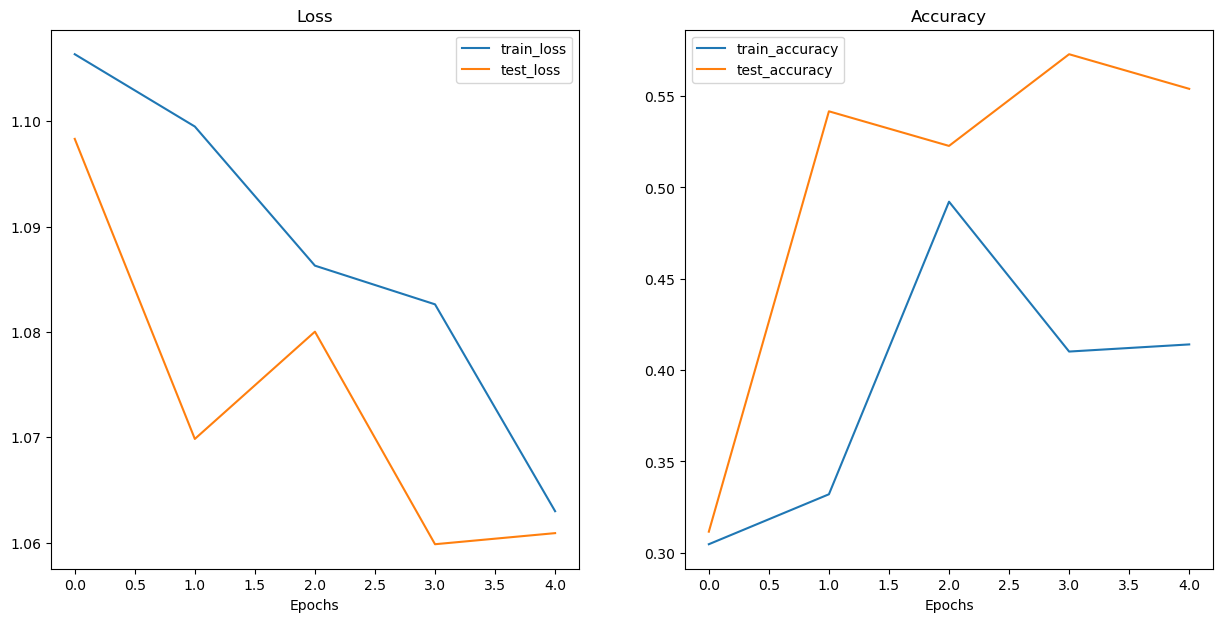

In [59]:
plot_loss_curves(model_0_results)

## 9. Model_1: TinyVgg with data augmentation

In [60]:
# Create transform with trivial augment

from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [61]:
# Create train, test dataset's and dataloader's with trivial augment

# Turn image folder into datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [62]:
# Turn datasets into dataloaders
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### 9.3 tinyvgg     
*this time data augmented*

In [63]:
torch.manual_seed(42)

model_1 = TinyVgg(in_channels=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVgg(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [65]:
# create loss, optimizer and train model_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)  

NUM_EPOCHS = 5

# setup loss function (criterion)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1, Train Loss: 1.1046, Train Acc: 0.2500, Test Loss: 1.1016, Test Acc: 0.2604
Epoch 2, Train Loss: 1.0764, Train Acc: 0.4258, Test Loss: 1.1301, Test Acc: 0.2604
Epoch 3, Train Loss: 1.0733, Train Acc: 0.4258, Test Loss: 1.1678, Test Acc: 0.2604
Epoch 4, Train Loss: 1.1217, Train Acc: 0.3047, Test Loss: 1.1554, Test Acc: 0.2604
Epoch 5, Train Loss: 1.0773, Train Acc: 0.4609, Test Loss: 1.1515, Test Acc: 0.2708
Total training time: 336.885 seconds


In [68]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [69]:
model_1_results

{'train_loss': [1.104576125741005,
  1.076425887644291,
  1.0732502490282059,
  1.1216801404953003,
  1.0772927105426788],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.4609375],
 'test_loss': [1.1015851895014446,
  1.1301107009251912,
  1.1678313215573628,
  1.155367652575175,
  1.1514509518941243],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2708333333333333]}

### Plot loss curve of model_1

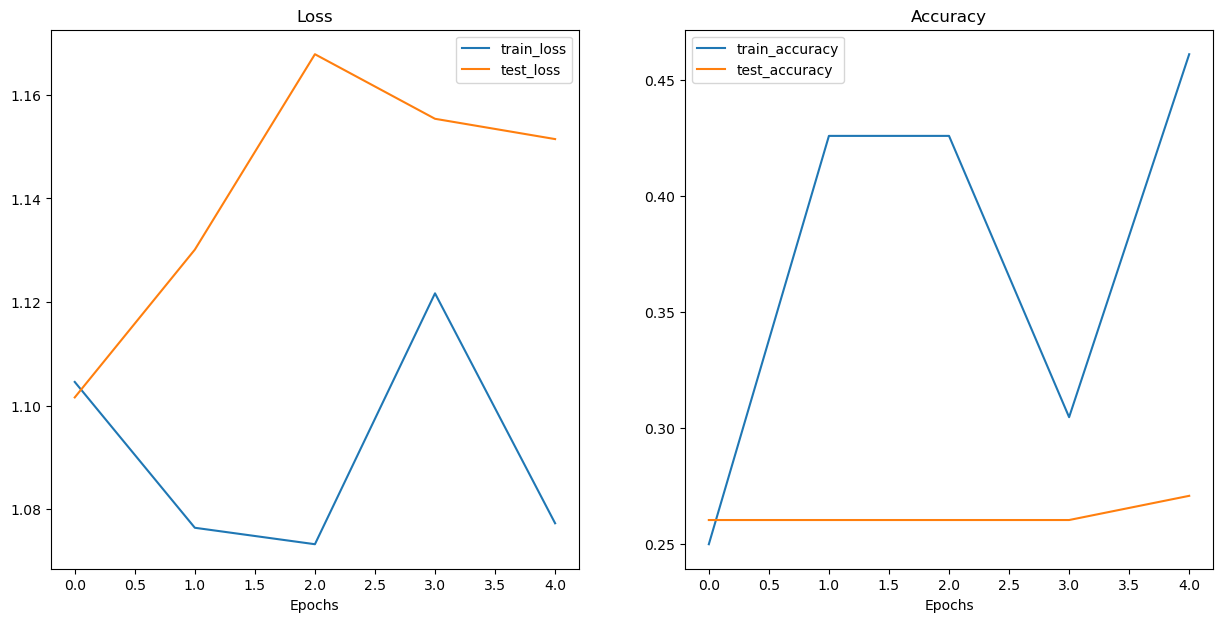

In [70]:
plot_loss_curves(model_1_results)

##  compare model results

ways:   
* hard coding
* Pytorch + Tensorboard
* weights and biases (site: wandb.ai)
* mlflow


In [76]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106342,0.304688,1.098314,0.311553
1,1.099484,0.332031,1.069852,0.541667
2,1.086289,0.492188,1.080026,0.522727
3,1.082620,0.410156,1.059866,0.572917
4,1.062998,0.414062,1.060918,0.553977


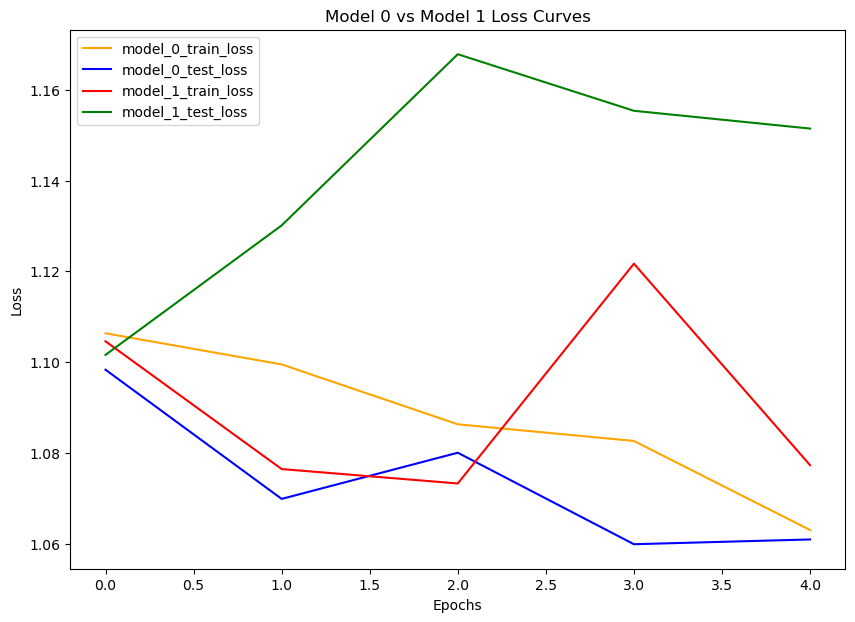

In [78]:
# Plot the loss curves

plt.figure(figsize=(10, 7))
plt.plot(model_0_df["train_loss"], label="model_0_train_loss", color="orange")
plt.plot(model_0_df["test_loss"], label="model_0_test_loss", color="blue")
plt.plot(model_1_df["train_loss"], label="model_1_train_loss", color="red")
plt.plot(model_1_df["test_loss"], label="model_1_test_loss", color="green")
plt.title("Model 0 vs Model 1 Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

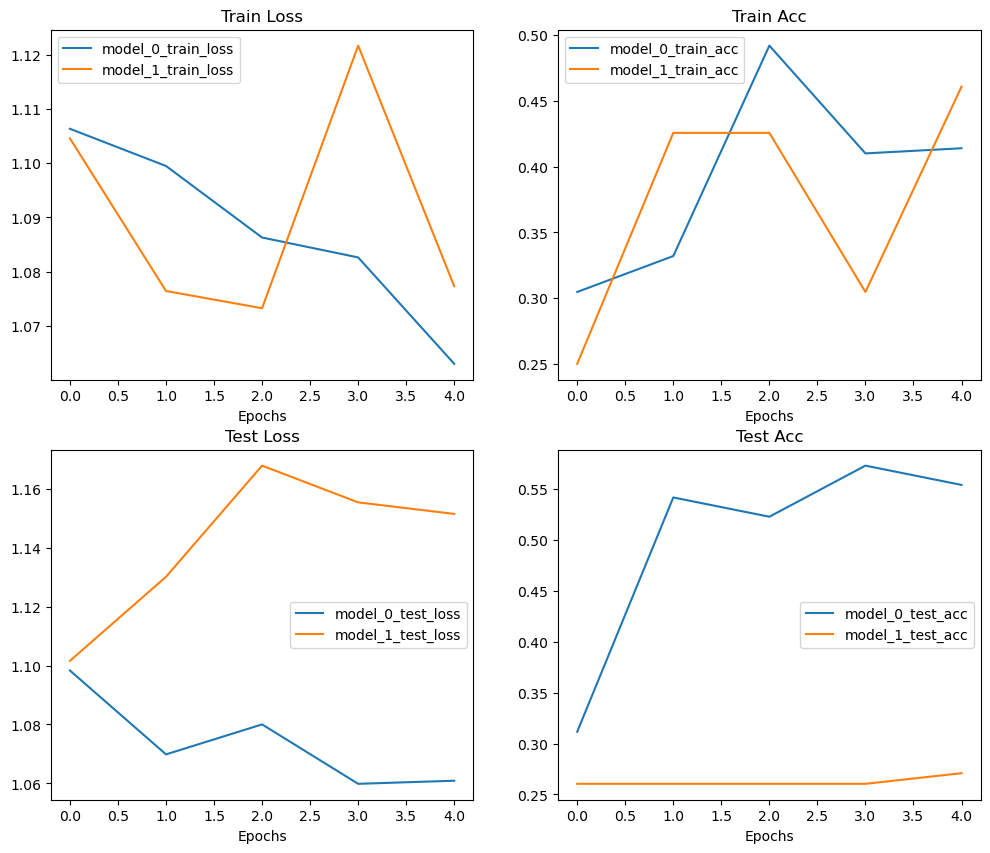

In [99]:
# setup plot
plt.figure(figsize=(12, 10))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)

plt.plot(epochs, model_0_df["train_loss"], label="model_0_train_loss")
plt.plot(epochs, model_1_df["train_loss"], label="model_1_train_loss")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()


plt.subplot(2,2,2)

plt.plot(epochs, model_0_df["train_acc"], label="model_0_train_acc")
plt.plot(epochs, model_1_df["train_acc"], label="model_1_train_acc")
plt.title("Train Acc")
plt.xlabel("Epochs")
plt.legend()


plt.subplot(2,2,3)

plt.plot(epochs, model_0_df["test_loss"], label="model_0_test_loss")
plt.plot(epochs, model_1_df["test_loss"], label="model_1_test_loss")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()


plt.subplot(2,2,4)

plt.plot(epochs, model_0_df["test_acc"], label="model_0_test_acc")
plt.plot(epochs, model_1_df["test_acc"], label="model_1_test_acc")
plt.title("Test Acc")
plt.xlabel("Epochs")

plt.legend()


In [138]:
## Making a prediction on a custom image (model_1 overfitted)

# downlad a custom image
import requests

# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg?raw=true")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

## 11.1 Loading in a custom image with pytorch

make usere custmo data image same formate as data model was trained on

* in ternsor form with dtype toch.float32
* of shape 64x64x3
* of the right device

In [139]:
import torchvision 

# read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

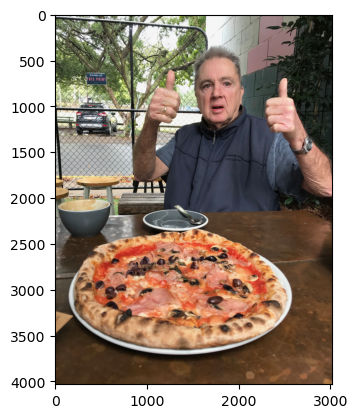

In [140]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))

In [143]:
print(custom_image_uint8.device)
print(custom_image_uint8.shape)
print(custom_image_uint8.dtype)

cpu
torch.Size([3, 4032, 3024])
torch.uint8


###  making a prediction on a custiom image with a trained pytorch model

In [149]:
# in uint8 format

model_1.eval()

with torch.inference_mode():
    model_1(custom_image_uint8.to(device))  

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [181]:
# load in the custom image and convert to torch.float32

custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image = custom_image/255.

In [159]:
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

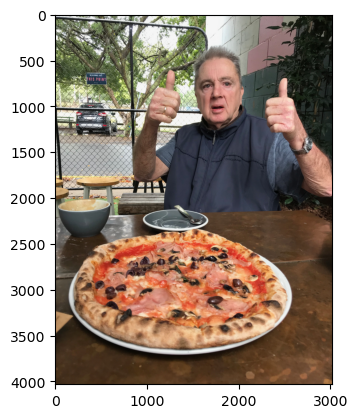

In [187]:
plt.imshow(custom_image.permute(1, 2, 0))

In [188]:
# create a transform pipeline to re resize image
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

# transform target image
custom_image_transformed = custom_image_transform(custom_image) 

# check the shape of the transformed image
custom_image_transformed.shape

torch.Size([3, 64, 64])

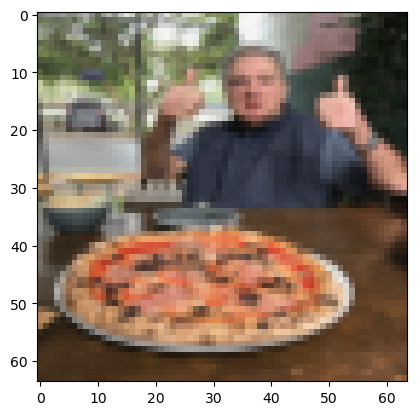

In [189]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [194]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

In [209]:
# Convert logits into pred probs

custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)

In [212]:
# convert pred probs into pred labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1)
class_name[custom_image_pred_labels]

'pizza'

## Puting custom image prediction all together

In [235]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    target_image = target_image / 255. 
    
    if transform:
        target_image = transform(target_image)
   
    model.to(device)
    
    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(dim=0)
    
        target_image_pred = model(target_image.to(device))
        
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) 
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

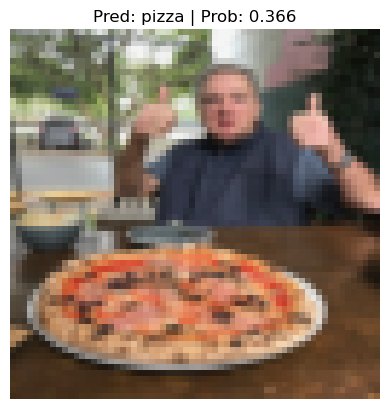

In [238]:
# Ppred on your custm image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_name,
                    transform=custom_image_transform,
                    device=device)

In [239]:
# Next 5 chapters of this book include:
# 1. Transfer learning with pretrained models
# 2. Convolutional Neural Networks (CNNs)
# 3. Recurrent Neural Networks (RNNs)
# 4. Generative Adversarial Networks (GANs)
# 5. Reinforcement Learning (RL)
# 6. Deploying a model to production
# 7. Advanced topics in deep learning
# 8. Conclusion and next steps

# which will be seen in the website of pytorch-deep-learning and will be paused for now because i dont exactly have the time (this one got me for a month and a half)